In [7]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
model = keras.Sequential ([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
    
    
])

In [5]:
## Recognize fashion
fmnist = tf.keras.datasets.fashion_mnist

In [6]:
#load the training and test split
(training_img, training_labels),(test_img, test_labels)=fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Label:0

 Image pixel array:
 [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42 

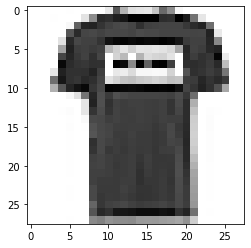

In [10]:
#index
index = 1

#set number of characters per row when printing
np.set_printoptions(linewidth=320)

print(f'Label:{training_labels[index]}')
print(f'\n Image pixel array:\n {training_img[index]}')

#visualize the image
plt.imshow(training_img[index], cmap='Greys')

In [11]:
#Normalize the pixels
training_img = training_img/225.0
test_img = test_img/225.0

In [22]:
#define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    
])

In [23]:
# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Train the model with a callback
model.fit(training_img, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4718 - accuracy: 0.8310
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3591 - accuracy: 0.8697
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3225 - accuracy: 0.8816
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3005 - accuracy: 0.8882
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2810 - accuracy: 0.8965


In [29]:
## Callback: to end the function
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        '''
        Halts the training after reaching 60 percent accuracy

        Args:
          epoch (integer) - index of epoch (required but unused in the function definition below)
          logs (dict) - metric results from the training epoch
        '''

        # Check accuracy
        if(logs.get('loss') < 0.4):

          # Stop if threshold is met
                print("\nLoss is lower than 0.4 so cancelling training!")
                self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [30]:
model.fit(training_img, training_labels, callbacks=[callbacks])

1864/1875 [============================>.] - ETA: 0s - loss: 0.2668 - accuracy: 0.9008
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2665 - accuracy: 0.9007
